sklearn Random Projection modules <br>
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.random_projection

わかりやすい Random Projection <br>
https://daily.belltail.jp/?p=737

using sklearn Random Projection <br>
http://blog.yhat.com/posts/sparse-random-projections.html

標準化と正規化 <br>
http://ailaby.com/scaler/

.DS_Store 対処方法 <br>
http://cly7796.net/wp/other/delete-all-ds-store/

In [116]:
import os
import cv2
import re
import numpy as np
import time
import warnings 
%matplotlib inline
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

main_folder_path = "/Users/yuunin/Downloads/SVM/CroppedYale/"

#print(os.listdir(main_folder_path))

labels = []
images = []

for subfolders in os.listdir(main_folder_path):
    if subfolders != ".DS_Store":
        for image_name in os.listdir(main_folder_path + subfolders):
            # もし画像データ(画素値とか)まで欲しかったらここで読み込んでappend
            image = cv2.imread(main_folder_path + subfolders + "/" + image_name)
            image = cv2.resize(image, (32, 32))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            images.append(image.flatten())
            labels.append(re.sub(r"[a-zA-Z]", "", subfolders))

images_dataset = np.array(images)

In [117]:
images_dataset.shape

(2470, 1024)

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.random_projection import johnson_lindenstrauss_min_dim, SparseRandomProjection, GaussianRandomProjection
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
#標準化 → 正規化よりも実用的?

def svm_Score(dataset):
    X = dataset
    y = labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    #データの標準化
    std_sc = StandardScaler()
    X_train_std = std_sc.fit_transform(X_train)
    X_test_std = std_sc.fit_transform(X_test)
    
    #データの正規化
    """
    mm_sc = MinMaxScaler()
    X_train_mm = mm_sc.fit_transform(X_train)
    X_test_mm = mm_sc.fit_transform(X_test)
    """
    
    clf = LinearSVC(random_state = 42)
    clf.fit(X_train_std, y_train)
    #print(classification_report(clf_1.predict(X_test_std), y_test))
    #print('Linear SVM Accuracy = {}'.format(clf.score(X_test_std, y_test) * 100))
    return clf.score(X_test_std, y_test) * 100
    

In [119]:
#baseline accuracy(using all components)
svm_Score(images_dataset)

94.73684210526315

In [169]:
num_comp = 192 #削減率 81%
ACC_SRP = []
TIME_SRP = []
ACC_RP = []
TIME_SRP = []

In [122]:
#reducing dimension of images_dataset using SparseRandomProjection
for num_comp in range(1, 600, 4):
    start_time = time.time()
    transformer = SparseRandomProjection(n_components = num_comp,
                                         density = 'auto',
                                         eps = 0.1,
                                         random_state = 42,
                                        )
    dtst_reduce = transformer.fit_transform(images_dataset)
    ACC_SRP.append(svm_Score(dtst_reduce))
    end_time = time.time()
    TIME_SRP.append(end_time - start_time)

In [156]:
#reducing dimension using Gaussian Random Projection
for num_comp in range(1, 600, 4):
    start_time = time.time()
    transformer = GaussianRandomProjection(n_components = num_comp,
                                         eps = 0.1,
                                         random_state = 42,
                                        )
    dtst_reduce = transformer.fit_transform(images_dataset)
    ACC_RP.append(svm_Score(dtst_reduce))
    end_time = time.time()
    TIME_RP.append(end_time - start_time)


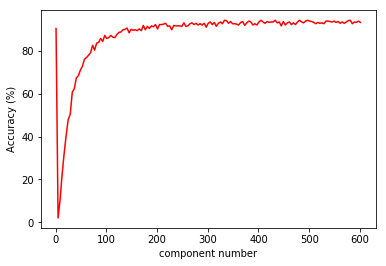

90.48582995951418
92.91497975708502
91.7004048582996
93.52226720647774


In [162]:
fig, ax = plt.subplots()
x = range(1, 600, 4)
plt.xlabel("component number")
plt.ylabel("Accuracy (%)")
plt.plot(x, ACC_1, color = "red")
#ax.hlines(y = mean_acc, xmin = 0, xmax = 600, color = "blue")
plt.show()

* RPとSRPの精度グラフを同じセルに表示する
* RPとSRPの精度グラフを重ねるとわかりやすいかも

ValueError: x and y must have same first dimension, but have shapes (55,) and (151,)

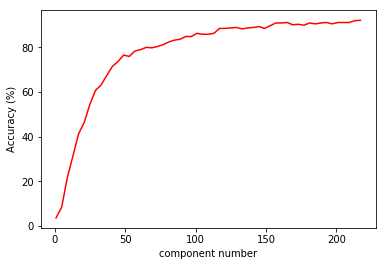

In [165]:
#Gaussian Random Projection Accuracy
x = range(1, 600, 4)
plt.xlabel("component number")
plt.ylabel("Accuracy (%)")
plt.plot(x, ACC_SRP, color = "red")
#ax.hlines(y = mean_acc, xmin = 0, xmax = 600, color = "blue")
plt.plot(x, ACC_RP, color = "blue")
plt.show()



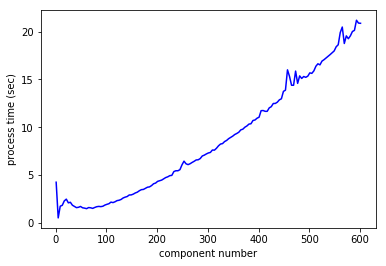

4.929110050201416
19.56860899925232


In [149]:
#Sparse Random Projection processing time
plt.xlabel("component number")
plt.ylabel("process time (sec)")
plt.plot(x, process_time_1, color = "blue")
plt.show()
print(process_time_1[56])
print(process_time_1[143])

In [139]:
sum_acc = 0
for i in range(50, 150):
    sum_acc = sum_acc + ACC_1[i]
mean_acc = sum_acc / 100
print(mean_acc)

92.95141700404857


# unused

In [54]:
#Reducing Dimension using Johnson Lindenstrauss Minimum Dimension Projection
#finds the best dimension number to reduce 
transformer = johnson_lindenstrauss_min_dim(n_samples = 1024,
                                           eps = 0.77)
transformer

192

In [ ]:
images_dataset = np.array(images)
np.set_printoptions(edgeitems = 8)
data_X_file = open("CroppedYale_data", "w")
data_X_file.write(str(images_dataset))
data_X_file.close()

In [ ]:
np.set_printoptions(edgeitems = 4)
data_X_file = open("CroppedYale_data_DimReduced", "w")
data_X_file.write(str(im_dataset_reduced))
data_X_file.close()